In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Pretrained model on ImageNet
from tensorflow import keras

base_model = keras.applications.EfficientNetB1(
    weights='imagenet',
    input_shape=(240, 240, 3),
    include_top=False)

27018416/27018416 [==============================] - 1s 0us/step


In [ ]:
# Freeze base model
base_model.trainable = False


In [ ]:
# Create inputs with correct shape
inputs = keras.Input(shape=(240, 240, 3))

x = base_model(inputs, training=False)

# Add pooling layer or flatten layer
x = keras.layers.GlobalAveragePooling2D()(x)


# Add final dense layer
outputs = keras.layers.Dense(85, activation = 'softmax')(x)


# Combine inputs and outputs to create model
model = keras.Model(inputs,outputs)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 efficientnetb1 (Functional)  (None, 8, 8, 1280)       6575239   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 85)                108885    
                                                                 
Total params: 6,684,124
Trainable params: 108,885
Non-trainable params: 6,575,239
_________________________________________________________________


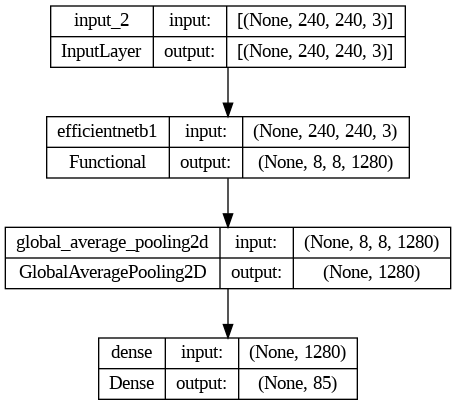

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# compile the model with loss and metrics options
model.compile(loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
#Augment the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True) # randomnly flip images

In [ ]:
# load and iterate training dataset
train_it = datagen.flow_from_directory('/content/drive/MyDrive/trafficsigns/train', 
                                       target_size=(240,240), 
                                       color_mode='rgb', 
                                       class_mode="categorical")
# load and iterate validation dataset
valid_it = datagen.flow_from_directory('/content/drive/MyDrive/trafficsigns/test', 
                                      target_size=(240,240), 
                                      color_mode='rgb', 
                                      class_mode="categorical")

Found 4438 images belonging to 85 classes.
Found 1288 images belonging to 85 classes.


Epoch 1/10
138/138 [==============================] - 2270s 16s/step - loss: 3.8080 - accuracy: 0.1859 - val_loss: 3.5644 - val_accuracy: 0.2127
Epoch 2/10
138/138 [==============================] - 961s 7s/step - loss: 3.2745 - accuracy: 0.2697 - val_loss: 3.3291 - val_accuracy: 0.2632
Epoch 3/10
138/138 [==============================] - 960s 7s/step - loss: 3.0378 - accuracy: 0.3062 - val_loss: 3.2488 - val_accuracy: 0.2989
Epoch 4/10
138/138 [==============================] - 966s 7s/step - loss: 2.9409 - accuracy: 0.3348 - val_loss: 3.1420 - val_accuracy: 0.3144
Epoch 5/10
138/138 [==============================] - 942s 7s/step - loss: 2.8172 - accuracy: 0.3562 - val_loss: 3.0455 - val_accuracy: 0.3307
Epoch 6/10
138/138 [==============================] - 925s 7s/step - loss: 2.8622 - accuracy: 0.3691 - val_loss: 2.9948 - val_accuracy: 0.3393
Epoch 7/10
138/138 [==============================] - 913s 7s/step - loss: 2.7230 - accuracy: 0.3896 - val_loss: 2.8006 - val_accuracy: 0.36

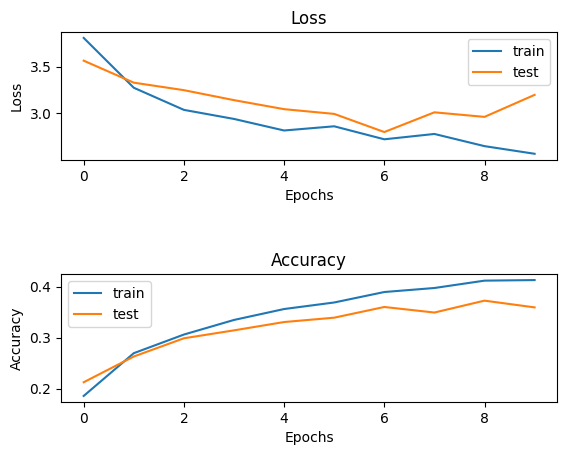

In [ ]:
history = model.fit(train_it,
          validation_data=valid_it,
          steps_per_epoch=train_it.samples/32,
          validation_steps=valid_it.samples/32,
          epochs=10)

import matplotlib.pyplot as pyplot
%matplotlib inline

pyplot.subplots_adjust(hspace=0.9)

pyplot.subplot(211)
pyplot.title('Loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')

pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
import numpy as np


# Custom function to load and predict label for the image
def predict(img_rel_path):
    img = '/content/drive/MyDrive/trafficsigns/test/ALL_MOTOR_VEHICLE_PROHIBITED/00017.jpg'
    plt.imshow(img)
    # Convert Image to a numpy array
    # Resize the image
    img = img.resize((240, 240))

    # Convert the image to a numpy array
    img_array = np.array(img, dtype=np.uint8)

    # Scaling the Image Array values between 0 and 1
    img = np.array(img)/255.0

    # Plotting the Loaded Image
    plt.title("Loaded Image")
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()

    x

    # Get the Predicted Label for the loaded Image
    p = model.predict(img[np.newaxis, ...])





 # Label array
    labels = {0: 'ALL_MOTOR_VEHICLE_PROHIBITED', 1: 'AXLE_LOAD_LIMIT', 2: 'BARRIER_AHEAD', 3: 'BULLOCK_AND_HANDCART_PROHIBITED', 4: 'Dragonfly', 5: 'CATTLE',
              6: 'COMPULSARY_AHEAD', 7: 'COMPULSARY_AHEAD_OR_TURN_LEFT', 8: 'COMPULSARY_AHEAD_OR_TURN_RIGHT', 9: 'COMPULSARY_CYCLE_TRACK',10: 'COMPULSARY_KEEP_RIGHT',11: 'COMPULSARY_KEEP_RIGHT',12: 'COMPULSARY_MINIMUM_SPEED',13: 'COMPULSARY_SOUND_HORN',14: 'COMPULSARY_TURN_LEFT',
             15: 'COMPULSARY_TURN_LEFT_AHEAD',16: 'COMPULSARY_TURN_RIGHT',17: 'COMPULSARY_TURN_RIGHT_AHEAD',18: 'CROSS_ROAD',19: 'CYCLE_CROSSING',20: 'CYCLE_PROHIBITED',21: 'DANGEROUS_DIP',
             22: 'DIRECTION',23: 'FALLING_ROCKS',24: 'FERRY',25: 'GAP_IN_MEDIAN',26: 'GIVE_WAY',27: 'GUARDED_LEVEL_CROSSING',28: 'HANDCART_PROHIBITED',



             29: 'HEIGHT_LIMIT',30: 'HORN_PROHIBITED',31: 'HUMP_OR_ROUGH_ROAD',32: 'LEFT_HAIR_PIN_BEND',33: 'LEFT_HAND_CURVE',34: 'LEFT_REVERSE_BEND',35: 'LEFT_TURN_PROHIBITED',
             36: 'LENGTH_LIMIT',37: 'LOAD_LIMIT',38: 'LOOSE_GRAVEL',39: 'MEN_AT_WORK',40: 'NARROW_BRIDGE',41: 'NARROW_ROAD_AHEAD',42: 'NO_ENTRY',
             43: 'NO_PARKING',44: 'NO_STOPPING_OR_STANDING',45: 'OVERTAKING_PROHIBITED',46: 'PASS_EITHER_SIDE',47: 'PEDESTRIAN_CROSSING',48: 'PEDESTRIAN_PROHIBITED',49: 'PRIORITY_FOR_ONCOMING_VEHICLES',
             50: 'QUAY_SIDE_OR_RIVER_BANK',51: 'RESTRICTION_ENDS',52: 'RIGHT_HAIR_PIN_BEND',53: 'RIGHT_HAND_CURVE',54: 'RIGHT_REVERSE_BEND',55: 'RIGHT_TURN_PROHIBITED',56: 'ROAD_WIDENS_AHEAD',
             57: 'ROUNDABOUT',58: 'SCHOOL_AHEAD',59: 'SIDE_ROAD_LEFT',60: 'SIDE_ROAD_RIGHT',61: 'SLIPPERY_ROAD',62: 'SPEED_LIMIT_15',63: 'SPEED_LIMIT_20',



             64: 'SPEED_LIMIT_30',65: 'SPEED_LIMIT_40',66: 'SPEED_LIMIT_5',67: 'SPEED_LIMIT_50',68: 'SPEED_LIMIT_60',69: 'SPEED_LIMIT_70',70: 'SPEED_LIMIT_80',
             71: 'STAGGERED_INTERSECTION',72: 'STEEP_ASCENT',73: 'STEEP_DESCENT',74: 'STOP',75: 'STRAIGHT_PROHIBITED',76: 'TONGA_PROHIBITED',77: 'TRAFFIC_SIGNAL',
             78: 'TRUCK_PROHIBITED',79: 'TURN_RIGHT',80: 'T_INTERSECTION',81: 'UNGUARDED_LEVEL_CROSSING',82: 'U_TURN_PROHIBITED',83: 'WIDTH_LIMIT',84: 'Y_INTERSECTION',}

    print("\n\nMaximum Probability: ", np.max(p[0], axis=-1))
    predicted_class = labels[np.argmax(p[0], axis=-1)]
    print("Classified:", predicted_class, "\n\n")



    classes=[]
    prob=[]
    print("\n-------------------Individual Probability--------------------------------\n")

    for i,j in enumerate (p[0],0):
        print(labels[i].upper(),':',round(j*100,2),'%')
        classes.append(labels[i])
        prob.append(round(j*100,2))

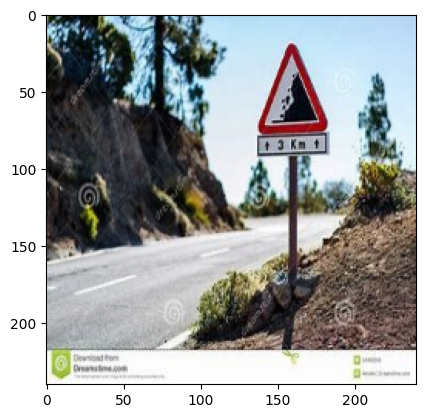

1/1 [==============================] - 0s 498ms/step


Maximum Probability:  0.13228248
Classified: FALLING_ROCKS 




In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('/content/drive/MyDrive/trafficsigns/test/FALLING_ROCKS/23013.jpg')

# Resize the image
img = cv2.resize(img, (240, 240))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Convert the image to a numpy array
img_array = np.array(img, dtype=np.uint8)

# Preprocess the image
img_array = img_array.astype('float32') / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Get the Predicted Label for the loaded Image
p = model.predict(img[np.newaxis, ...])

# Label array
labels = {0: 'ALL_MOTOR_VEHICLE_PROHIBITED', 1: 'AXLE_LOAD_LIMIT', 2: 'BARRIER_AHEAD', 3: 'BULLOCK_AND_HANDCART_PROHIBITED', 4: 'Dragonfly', 5: 'CATTLE',
              6: 'COMPULSARY_AHEAD', 7: 'COMPULSARY_AHEAD_OR_TURN_LEFT', 8: 'COMPULSARY_AHEAD_OR_TURN_RIGHT', 9: 'COMPULSARY_CYCLE_TRACK',10: 'COMPULSARY_KEEP_RIGHT',11: 'COMPULSARY_KEEP_RIGHT',12: 'COMPULSARY_MINIMUM_SPEED',13: 'COMPULSARY_SOUND_HORN',14: 'COMPULSARY_TURN_LEFT',
             15: 'COMPULSARY_TURN_LEFT_AHEAD',16: 'COMPULSARY_TURN_RIGHT',17: 'COMPULSARY_TURN_RIGHT_AHEAD',18: 'CROSS_ROAD',19: 'CYCLE_CROSSING',20: 'CYCLE_PROHIBITED',21: 'DANGEROUS_DIP',
             22: 'DIRECTION',23: 'FALLING_ROCKS',24: 'FERRY',25: 'GAP_IN_MEDIAN',26: 'GIVE_WAY',27: 'GUARDED_LEVEL_CROSSING',28: 'HANDCART_PROHIBITED',



             29: 'HEIGHT_LIMIT',30: 'HORN_PROHIBITED',31: 'HUMP_OR_ROUGH_ROAD',32: 'LEFT_HAIR_PIN_BEND',33: 'LEFT_HAND_CURVE',34: 'LEFT_REVERSE_BEND',35: 'LEFT_TURN_PROHIBITED',
             36: 'LENGTH_LIMIT',37: 'LOAD_LIMIT',38: 'LOOSE_GRAVEL',39: 'MEN_AT_WORK',40: 'NARROW_BRIDGE',41: 'NARROW_ROAD_AHEAD',42: 'NO_ENTRY',
             43: 'NO_PARKING',44: 'NO_STOPPING_OR_STANDING',45: 'OVERTAKING_PROHIBITED',46: 'PASS_EITHER_SIDE',47: 'PEDESTRIAN_CROSSING',48: 'PEDESTRIAN_PROHIBITED',49: 'PRIORITY_FOR_ONCOMING_VEHICLES',
             50: 'QUAY_SIDE_OR_RIVER_BANK',51: 'RESTRICTION_ENDS',52: 'RIGHT_HAIR_PIN_BEND',53: 'RIGHT_HAND_CURVE',54: 'RIGHT_REVERSE_BEND',55: 'RIGHT_TURN_PROHIBITED',56: 'ROAD_WIDENS_AHEAD',
             57: 'ROUNDABOUT',58: 'SCHOOL_AHEAD',59: 'SIDE_ROAD_LEFT',60: 'SIDE_ROAD_RIGHT',61: 'SLIPPERY_ROAD',62: 'SPEED_LIMIT_15',63: 'SPEED_LIMIT_20',



             64: 'SPEED_LIMIT_30',65: 'SPEED_LIMIT_40',66: 'SPEED_LIMIT_5',67: 'SPEED_LIMIT_50',68: 'SPEED_LIMIT_60',69: 'SPEED_LIMIT_70',70: 'SPEED_LIMIT_80',
             71: 'STAGGERED_INTERSECTION',72: 'STEEP_ASCENT',73: 'STEEP_DESCENT',74: 'STOP',75: 'STRAIGHT_PROHIBITED',76: 'TONGA_PROHIBITED',77: 'TRAFFIC_SIGNAL',
             78: 'TRUCK_PROHIBITED',79: 'TURN_RIGHT',80: 'T_INTERSECTION',81: 'UNGUARDED_LEVEL_CROSSING',82: 'U_TURN_PROHIBITED',83: 'WIDTH_LIMIT',84: 'Y_INTERSECTION',}

print("\n\nMaximum Probability: ", np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:", predicted_class, "\n\n")


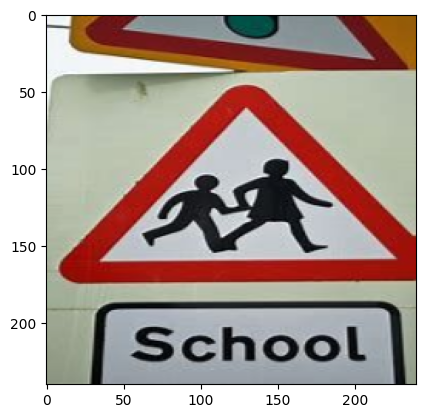

1/1 [==============================] - 0s 215ms/step


Maximum Probability:  0.19149831
Classified: SCHOOL_AHEAD 




In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('/content/drive/MyDrive/trafficsigns/test/SCHOOL_AHEAD/58024.jpg')

# Resize the image
img = cv2.resize(img, (240, 240))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Convert the image to a numpy array
img_array = np.array(img, dtype=np.uint8)

# Preprocess the image
img_array = img_array.astype('float32') / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Get the Predicted Label for the loaded Image
p = model.predict(img[np.newaxis, ...])

# Label array
labels = {0: 'ALL_MOTOR_VEHICLE_PROHIBITED', 1: 'AXLE_LOAD_LIMIT', 2: 'BARRIER_AHEAD', 3: 'BULLOCK_AND_HANDCART_PROHIBITED', 4: 'Dragonfly', 5: 'CATTLE',
              6: 'COMPULSARY_AHEAD', 7: 'COMPULSARY_AHEAD_OR_TURN_LEFT', 8: 'COMPULSARY_AHEAD_OR_TURN_RIGHT', 9: 'COMPULSARY_CYCLE_TRACK',10: 'COMPULSARY_KEEP_RIGHT',11: 'COMPULSARY_KEEP_RIGHT',12: 'COMPULSARY_MINIMUM_SPEED',13: 'COMPULSARY_SOUND_HORN',14: 'COMPULSARY_TURN_LEFT',
             15: 'COMPULSARY_TURN_LEFT_AHEAD',16: 'COMPULSARY_TURN_RIGHT',17: 'COMPULSARY_TURN_RIGHT_AHEAD',18: 'CROSS_ROAD',19: 'CYCLE_CROSSING',20: 'CYCLE_PROHIBITED',21: 'DANGEROUS_DIP',
             22: 'DIRECTION',23: 'FALLING_ROCKS',24: 'FERRY',25: 'GAP_IN_MEDIAN',26: 'GIVE_WAY',27: 'GUARDED_LEVEL_CROSSING',28: 'HANDCART_PROHIBITED',



             29: 'HEIGHT_LIMIT',30: 'HORN_PROHIBITED',31: 'HUMP_OR_ROUGH_ROAD',32: 'LEFT_HAIR_PIN_BEND',33: 'LEFT_HAND_CURVE',34: 'LEFT_REVERSE_BEND',35: 'LEFT_TURN_PROHIBITED',
             36: 'LENGTH_LIMIT',37: 'LOAD_LIMIT',38: 'LOOSE_GRAVEL',39: 'MEN_AT_WORK',40: 'NARROW_BRIDGE',41: 'NARROW_ROAD_AHEAD',42: 'NO_ENTRY',
             43: 'NO_PARKING',44: 'NO_STOPPING_OR_STANDING',45: 'OVERTAKING_PROHIBITED',46: 'PASS_EITHER_SIDE',47: 'PEDESTRIAN_CROSSING',48: 'PEDESTRIAN_PROHIBITED',49: 'PRIORITY_FOR_ONCOMING_VEHICLES',
             50: 'QUAY_SIDE_OR_RIVER_BANK',51: 'RESTRICTION_ENDS',52: 'RIGHT_HAIR_PIN_BEND',53: 'RIGHT_HAND_CURVE',54: 'RIGHT_REVERSE_BEND',55: 'RIGHT_TURN_PROHIBITED',56: 'ROAD_WIDENS_AHEAD',
             57: 'ROUNDABOUT',58: 'SCHOOL_AHEAD',59: 'SIDE_ROAD_LEFT',60: 'SIDE_ROAD_RIGHT',61: 'SLIPPERY_ROAD',62: 'SPEED_LIMIT_15',63: 'SPEED_LIMIT_20',



             64: 'SPEED_LIMIT_30',65: 'SPEED_LIMIT_40',66: 'SPEED_LIMIT_5',67: 'SPEED_LIMIT_50',68: 'SPEED_LIMIT_60',69: 'SPEED_LIMIT_70',70: 'SPEED_LIMIT_80',
             71: 'STAGGERED_INTERSECTION',72: 'STEEP_ASCENT',73: 'STEEP_DESCENT',74: 'STOP',75: 'STRAIGHT_PROHIBITED',76: 'TONGA_PROHIBITED',77: 'TRAFFIC_SIGNAL',
             78: 'TRUCK_PROHIBITED',79: 'TURN_RIGHT',80: 'T_INTERSECTION',81: 'UNGUARDED_LEVEL_CROSSING',82: 'U_TURN_PROHIBITED',83: 'WIDTH_LIMIT',84: 'Y_INTERSECTION',}

print("\n\nMaximum Probability: ", np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:", predicted_class, "\n\n")


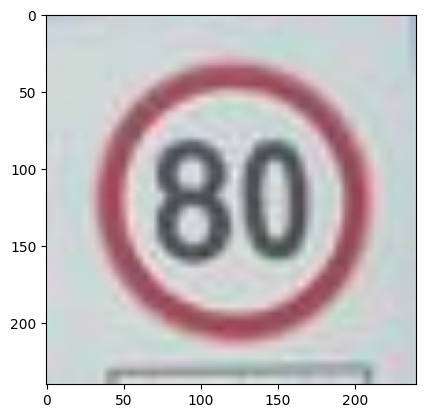

1/1 [==============================] - 0s 246ms/step


Maximum Probability:  0.3790612
Classified: SPEED_LIMIT_80 




In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('/content/drive/MyDrive/trafficsigns/test/SPEED_LIMIT_80/70116.jpg')

# Resize the image
img = cv2.resize(img, (240, 240))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Convert the image to a numpy array
img_array = np.array(img, dtype=np.uint8)

# Preprocess the image
img_array = img_array.astype('float32') / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Get the Predicted Label for the loaded Image
p = model.predict(img[np.newaxis, ...])

# Label array
labels = {0: 'ALL_MOTOR_VEHICLE_PROHIBITED', 1: 'AXLE_LOAD_LIMIT', 2: 'BARRIER_AHEAD', 3: 'BULLOCK_AND_HANDCART_PROHIBITED', 4: 'Dragonfly', 5: 'CATTLE',
              6: 'COMPULSARY_AHEAD', 7: 'COMPULSARY_AHEAD_OR_TURN_LEFT', 8: 'COMPULSARY_AHEAD_OR_TURN_RIGHT', 9: 'COMPULSARY_CYCLE_TRACK',10: 'COMPULSARY_KEEP_RIGHT',11: 'COMPULSARY_KEEP_RIGHT',12: 'COMPULSARY_MINIMUM_SPEED',13: 'COMPULSARY_SOUND_HORN',14: 'COMPULSARY_TURN_LEFT',
             15: 'COMPULSARY_TURN_LEFT_AHEAD',16: 'COMPULSARY_TURN_RIGHT',17: 'COMPULSARY_TURN_RIGHT_AHEAD',18: 'CROSS_ROAD',19: 'CYCLE_CROSSING',20: 'CYCLE_PROHIBITED',21: 'DANGEROUS_DIP',
             22: 'DIRECTION',23: 'FALLING_ROCKS',24: 'FERRY',25: 'GAP_IN_MEDIAN',26: 'GIVE_WAY',27: 'GUARDED_LEVEL_CROSSING',28: 'HANDCART_PROHIBITED',



             29: 'HEIGHT_LIMIT',30: 'HORN_PROHIBITED',31: 'HUMP_OR_ROUGH_ROAD',32: 'LEFT_HAIR_PIN_BEND',33: 'LEFT_HAND_CURVE',34: 'LEFT_REVERSE_BEND',35: 'LEFT_TURN_PROHIBITED',
             36: 'LENGTH_LIMIT',37: 'LOAD_LIMIT',38: 'LOOSE_GRAVEL',39: 'MEN_AT_WORK',40: 'NARROW_BRIDGE',41: 'NARROW_ROAD_AHEAD',42: 'NO_ENTRY',
             43: 'NO_PARKING',44: 'NO_STOPPING_OR_STANDING',45: 'OVERTAKING_PROHIBITED',46: 'PASS_EITHER_SIDE',47: 'PEDESTRIAN_CROSSING',48: 'PEDESTRIAN_PROHIBITED',49: 'PRIORITY_FOR_ONCOMING_VEHICLES',
             50: 'QUAY_SIDE_OR_RIVER_BANK',51: 'RESTRICTION_ENDS',52: 'RIGHT_HAIR_PIN_BEND',53: 'RIGHT_HAND_CURVE',54: 'RIGHT_REVERSE_BEND',55: 'RIGHT_TURN_PROHIBITED',56: 'ROAD_WIDENS_AHEAD',
             57: 'ROUNDABOUT',58: 'SCHOOL_AHEAD',59: 'SIDE_ROAD_LEFT',60: 'SIDE_ROAD_RIGHT',61: 'SLIPPERY_ROAD',62: 'SPEED_LIMIT_15',63: 'SPEED_LIMIT_20',



             64: 'SPEED_LIMIT_30',65: 'SPEED_LIMIT_40',66: 'SPEED_LIMIT_5',67: 'SPEED_LIMIT_50',68: 'SPEED_LIMIT_60',69: 'SPEED_LIMIT_70',70: 'SPEED_LIMIT_80',
             71: 'STAGGERED_INTERSECTION',72: 'STEEP_ASCENT',73: 'STEEP_DESCENT',74: 'STOP',75: 'STRAIGHT_PROHIBITED',76: 'TONGA_PROHIBITED',77: 'TRAFFIC_SIGNAL',
             78: 'TRUCK_PROHIBITED',79: 'TURN_RIGHT',80: 'T_INTERSECTION',81: 'UNGUARDED_LEVEL_CROSSING',82: 'U_TURN_PROHIBITED',83: 'WIDTH_LIMIT',84: 'Y_INTERSECTION',}

print("\n\nMaximum Probability: ", np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:", predicted_class, "\n\n")
